In [2]:
import numpy as np
import pandas as pd
covid = pd.read_csv('covid.csv')
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230324 entries, 0 to 230323
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            230324 non-null  object 
 1   Country/Region  230324 non-null  object 
 2   Province/State  72179 non-null   object 
 3   Confirmed       230324 non-null  int64  
 4   Recovered       217348 non-null  float64
 5   Deaths          230324 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.5+ MB


In [64]:
year_in=int(input("Mời nhập năm: "))

Mời nhập năm: 2020


In [95]:
country_in=input("Mời nhập quốc gia: ")

Mời nhập quốc gia: China


In [75]:
#Lấp các trường None
covid=covid.fillna(0)
#Convert cột Date-> ngày tháng
covid_year_in=covid[covid['Date'].dt.year==year_in]
print(covid_year_in)

             Date Country/Region Province/State  Confirmed  Recovered  Deaths
0      2020-01-22    Afghanistan              0          0        0.0       0
1      2020-01-23    Afghanistan              0          0        0.0       0
2      2020-01-24    Afghanistan              0          0        0.0       0
3      2020-01-25    Afghanistan              0          0        0.0       0
4      2020-01-26    Afghanistan              0          0        0.0       0
...           ...            ...            ...        ...        ...     ...
229853 2020-12-27       Zimbabwe              0      13077    10593.0     349
229854 2020-12-28       Zimbabwe              0      13148    10705.0     354
229855 2020-12-29       Zimbabwe              0      13325    11067.0     359
229856 2020-12-30       Zimbabwe              0      13625    11154.0     360
229857 2020-12-31       Zimbabwe              0      13867    11250.0     363

[97980 rows x 6 columns]


In [101]:
import numpy as np
import matplotlib.pyplot as plt
import calendar

numpy_covid=covid.to_numpy()
confirmed=np.zeros(12)
recovered=np.zeros(12)
deaths=np.zeros(12)

confirmed_country=np.zeros(12)
recovered_country=np.zeros(12)
deaths_country=np.zeros(12)

for ngaythang,nuoc,tinh,nhiem,khoi,tuvong in numpy_covid:
    for thang in range (1,13):
        if ngaythang.year==year_in and ngaythang.is_month_end:
            confirmed[ngaythang.month-1]+=nhiem #cộng dồn các ngày cuối tháng
            recovered[ngaythang.month-1]+=khoi
            deaths[ngaythang.month-1]+=tuvong
            if nuoc.lower()==country_in.lower(): #Convert sang hết chữ thường để thuạn lợi khi nhập
                confirmed_country[ngaythang.month-1]=nhiem
                recovered_country[ngaythang.month-1]=khoi
                deaths_country[ngaythang.month-1]=tuvong


# Vẽ biểu đồ ca nhiễm toàn thế giới

In [ ]:

#Vẽ đồ thị
plt.plot(confirmed,'r',label='Ca nhiễm')
plt.plot(recovered,'b-',label='Ca đã khỏi')
plt.plot(deaths,'k',label='Ca tử vong')
plt.legend()
plt.title(f'BIỂU ĐỒ SỐ CA MẮC, KHỎI, TỬ VONG CỦA THẾ GIỚI TRONG NĂM {year_in}')

# Vẽ biểu đồ covid theo năm và nước nhập vào

Text(0.5, 1.0, 'BIỂU ĐỒ SỐ CA MẮC, KHỎI, TỬ VONG CỦA China TRONG NĂM 2020')

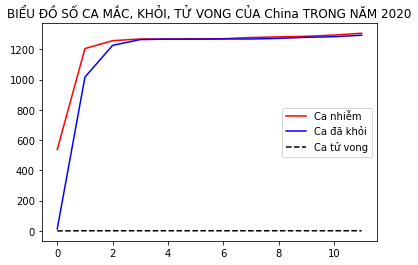

In [99]:
#Vẽ đồ thị
plt.plot(confirmed_country,'r',label='Ca nhiễm')
plt.plot(recovered_country,'b-',label='Ca đã khỏi')
plt.plot(deaths_country,'k--',label='Ca tử vong')
plt.legend()
plt.title(f'BIỂU ĐỒ SỐ CA MẮC, KHỎI, TỬ VONG CỦA {country_in} TRONG NĂM {year_in}')

# Vẽ biểu đồ covid nước Việt Nam năm 2020

Text(0.5, 1.0, 'BIỂU ĐỒ COVID VIỆT NAM QUA CÁC NĂM')

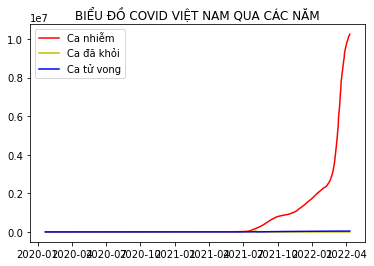

In [111]:
# lấy theo quốc gia
covid_VN=numpy_covid[numpy_covid[:,1]=='Vietnam']
# Vẽ biểu đồ
x=covid_VN[:,0]
y_nhiem=covid_VN[:,3]
z_khoi=covid_VN[:,4]
t_tuvong=covid_VN[:,5]
plt.plot(x,y_nhiem,'r',label='Ca nhiễm')
plt.plot(x,z_khoi,'y',label='Ca đã khỏi')
plt.plot(x,t_tuvong,'b',label='Ca tử vong')
plt.legend()
plt.title(f"BIỂU ĐỒ COVID VIỆT NAM QUA CÁC NĂM")

Text(0.5, 1.0, 'Biểu đồ histogram ca tử vong của Việt nam qua các năm')

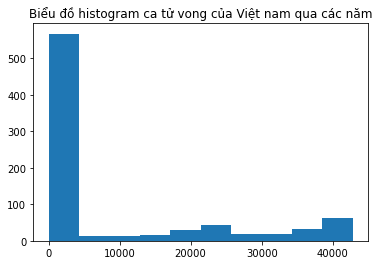

In [183]:
import seaborn as sns
sns.histplot(x=a,data=d)
